In [6]:
import matplotlib.pyplot as plt
import pandas as pd

Promethion48_TMO = 5,37e-02
Promethion48_keepup = 2,78e-02		
Promethion24_TMO = 2,69e-02
Promethion24_keepup = 1,39e-02

A100x8_speed_hac = 525244000
V100_speed_hac = 20104100
V100x2_speed_hac = 2*V100_speed_hac

A100x8_speed_sup = 99348920
V100_speed_sup = 3788265
V100x2_speed_sup = 2*V100_speed_sup

Gb_A100x8_speed_hac = 5.25E-02
Gb_V100_speed_hac = 2.01E-03
Gb_V100x2_speed_hac = 2*Gb_V100_speed_hac

Gb_A100x8_speed_sup = 9.93E-03
Gb_V100_speed_sup = 3.79E-04
Gb_V100x2_speed_sup = 2*Gb_V100_speed_sup

hac_setup_expected_speed = [A100x8_speed_hac,
                        A100x8_speed_hac+1*V100x2_speed_hac,
                        A100x8_speed_hac+2*V100x2_speed_hac,
                        A100x8_speed_hac+3*V100x2_speed_hac,
                        A100x8_speed_hac+4*V100x2_speed_hac,
                        A100x8_speed_hac*2,
                        2*A100x8_speed_hac+1*V100x2_speed_hac,
                        2*A100x8_speed_hac+2*V100x2_speed_hac,
                        2*A100x8_speed_hac+3*V100x2_speed_hac,
                        2*A100x8_speed_hac+4*V100x2_speed_hac,
                           ]

hac_setup_expected_speed_Gb = [speed/(10*1000*1000*1000) for speed in hac_setup_expected_speed]

sup_setup_expected_speed = [A100x8_speed_sup,
                        A100x8_speed_sup+1*V100x2_speed_sup,
                        A100x8_speed_sup+2*V100x2_speed_sup,
                        A100x8_speed_sup+3*V100x2_speed_sup,
                        A100x8_speed_sup+4*V100x2_speed_sup,
                        A100x8_speed_sup*2,
                        2*A100x8_speed_sup+1*V100x2_speed_sup,
                        2*A100x8_speed_sup+2*V100x2_speed_sup,
                        2*A100x8_speed_sup+3*V100x2_speed_sup,
                        2*A100x8_speed_sup+4*V100x2_speed_sup]

sup_setup_expected_speed_Gb = [speed/(10*1000*1000*1000) for speed in sup_setup_expected_speed]

#I need to calculate the theorical time
#calculate the samples or the Gb processed by the run and then calculate what time
#it would take using the baseline speed of each unit used in that model
size_hac_runs = 0.5*(9.7422E+11+9.7507E+11)
hac_setup_expected_time = [size_hac_runs/speed for speed in hac_setup_expected_speed]

size_sup_runs = 0.5*(8.7035E+11+8.7973E+11)
sup_setup_expected_time = [size_sup_runs/speed for speed in sup_setup_expected_speed]


# List of directory names
setup_names = [
    "1 DGX node",
    "1 DGX and 1 GPU node",
    "1 DGX and 2 GPU node",
    "1 DGX and 3 GPU node",
    "1 DGX and 4 GPU node",
    "2 DGX node",
    "2 DGX and 1 GPU node",
    "2 DGX and 2 GPU node",
    "2 DGX and 3 GPU node",
    "2 DGX and 4 GPU node",
]


print('HAC Expected speed')
print(hac_setup_expected_speed)
print()
print('HAC Expected time')
print(hac_setup_expected_time)
print()
df_runs_hac = pd.read_csv('runs_hac.csv')
df_runs_hac['setups'] = setup_names
print(df_runs_hac)
print("------------------------------")
print('SUP Expected speed')
print(sup_setup_expected_speed)
print()
print('SUP Expected time')
print(sup_setup_expected_time)
print()
df_runs_sup = pd.read_csv('runs_sup.csv')
df_runs_sup['setups'] = setup_names
print(df_runs_sup)



HAC Expected speed
[525244000, 565452200, 605660400, 645868600, 686076800, 1050488000, 1090696200, 1130904400, 1171112600, 1211320800]

HAC Expected time
[1855.6042524997906, 1723.6558633957034, 1609.226886882484, 1509.045338324235, 1420.606264488174, 927.8021262498953, 893.5989691721672, 861.8279316978517, 832.2385055032283, 804.613443441242]

                 setups  samples/s-sum  Gb/s-sum  total-time
0            1 DGX node   4.941100e+08  0.049411      2503.0
1  1 DGX and 1 GPU node   5.372600e+08  0.053726      2025.0
2  1 DGX and 2 GPU node   5.676400e+08  0.056764      1798.0
3  1 DGX and 3 GPU node   6.098400e+08  0.060984      1710.0
4  1 DGX and 4 GPU node   6.498900e+08  0.064989      1715.0
5            2 DGX node   9.532100e+08  0.095321      1213.0
6  2 DGX and 1 GPU node   9.911600e+08  0.099116      1092.0
7  2 DGX and 2 GPU node   1.032000e+09  0.103200      1183.0
8  2 DGX and 3 GPU node   1.077900e+09  0.107790      1183.0
9  2 DGX and 4 GPU node   1.117600e+09  0.1

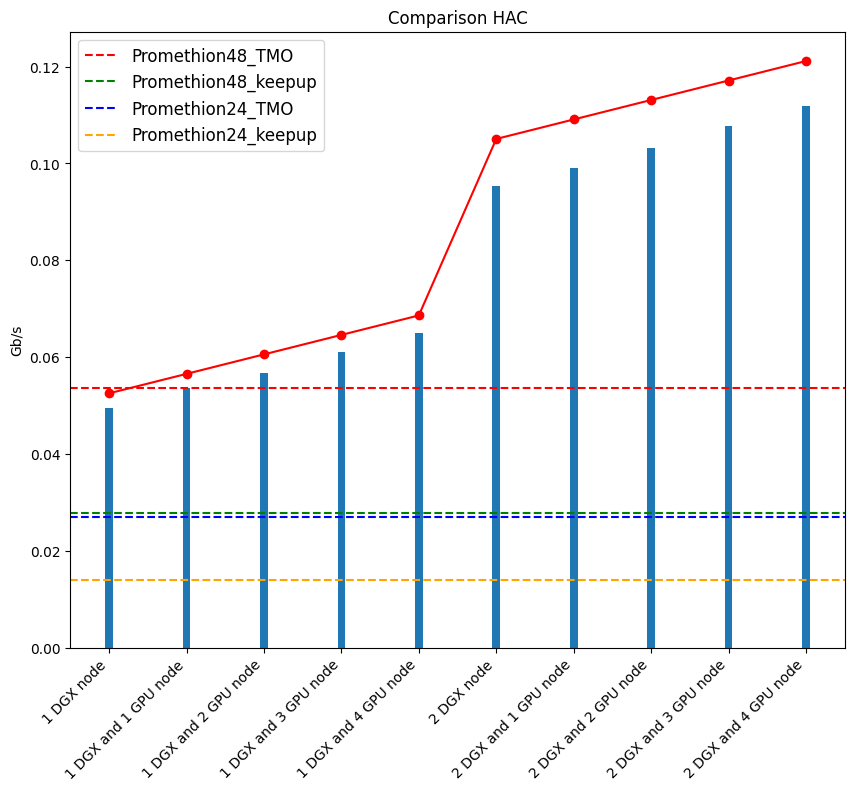

In [10]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
setup_values = df_runs_hac['setups']
gbps_values = df_runs_hac['Gb/s-sum']

# Create a bar plot
bars = plt.bar(setup_values, gbps_values, width=0.1)
dots = plt.plot(df_runs_hac['setups'],hac_setup_expected_speed_Gb, marker = 'o', color='red')

# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02,
    'Promethion48_keepup': 2.78e-02,
    'Promethion24_TMO': 2.69e-02,
    'Promethion24_keepup': 1.39e-02
}

colors = ['red', 'green', 'blue', 'orange']

for i, (label, value) in enumerate(values.items()):
    ax.axhline(y=value, color=colors[i], linestyle='--', label=label)

plt.title('Comparison HAC')
plt.ylabel('Gb/s')


# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
# Make legend smaller
ax.legend(fontsize='large')

plt.show()

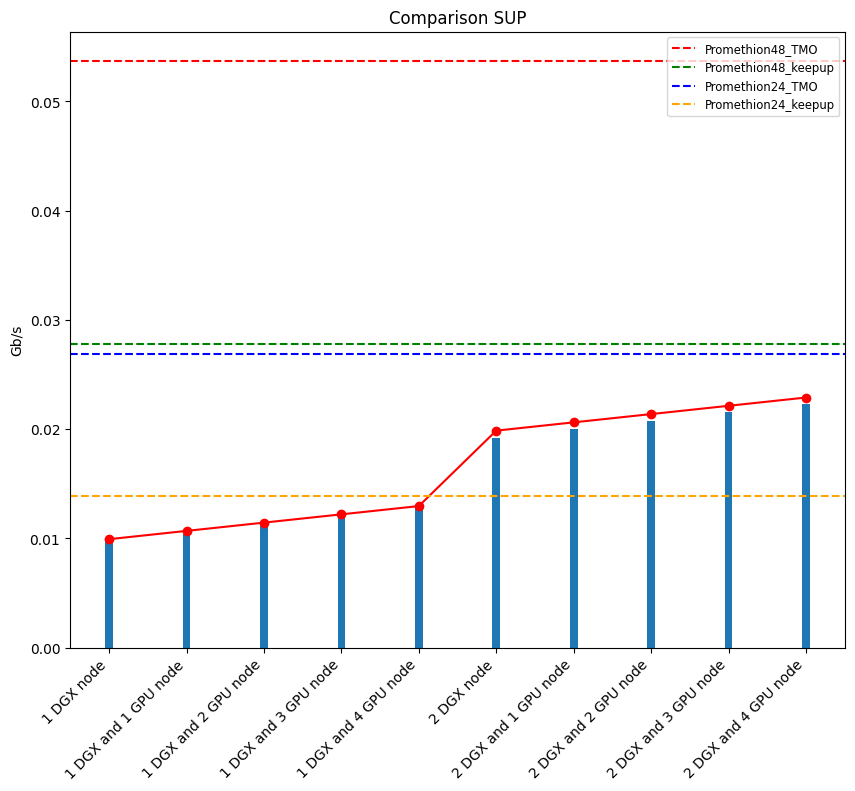

In [11]:
# Enlarge the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting
setup_values = df_runs_sup['setups']
gbps_values = df_runs_sup['Gb/s-sum']

# Create a bar plot
bars = plt.bar(setup_values, gbps_values, width=0.1)
dots = plt.plot(df_runs_sup['setups'],sup_setup_expected_speed_Gb, marker = 'o', color='red')

# Adding horizontal lines for the specified values in different colors
values = {
    'Promethion48_TMO': 5.37e-02,
    'Promethion48_keepup': 2.78e-02,
    'Promethion24_TMO': 2.69e-02,
    'Promethion24_keepup': 1.39e-02
}

colors = ['red', 'green', 'blue', 'orange']

for i, (label, value) in enumerate(values.items()):
    ax.axhline(y=value, color=colors[i], linestyle='--', label=label)

plt.title('Comparison SUP')
plt.ylabel('Gb/s')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
# Make legend smaller
ax.legend(fontsize='small')

plt.show()


# Percentage increment Samples/s


0     88.144938
1    104.575397
2    116.143354
3    132.212077
4    147.462132
5    262.958930
6    277.409356
7    292.960224
8    310.437816
9    325.554599
Name: samples/s-sum, dtype: float64


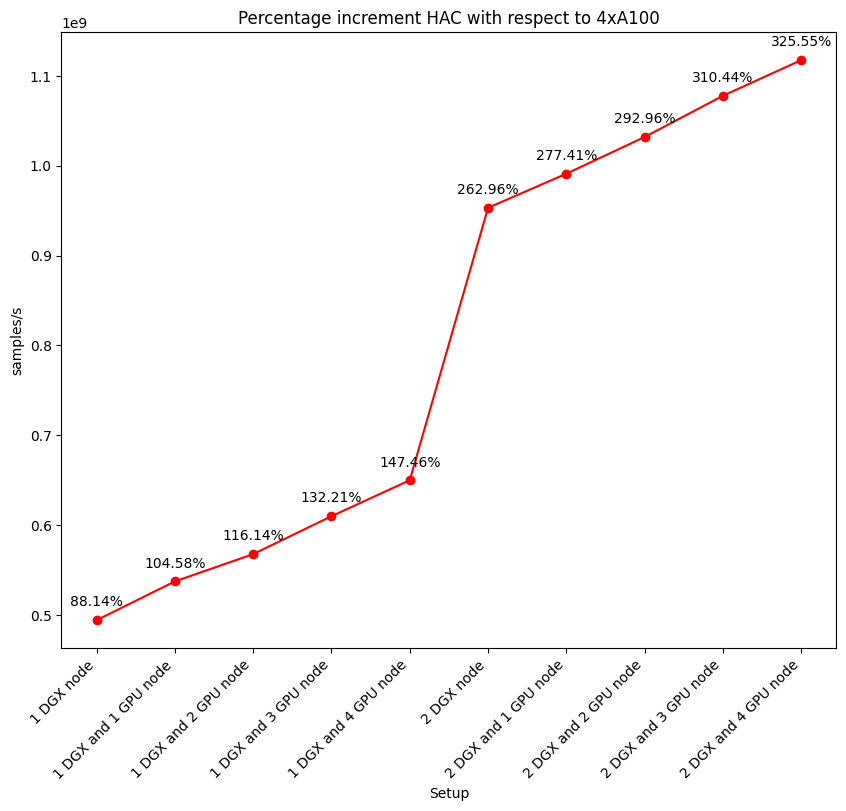

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

setup_values = df_runs_hac['setups']
samples_s_increment = ((df_runs_hac["samples/s-sum"] - 0.5 * A100x8_speed_hac) / (0.5 * A100x8_speed_hac)) * 100
print(samples_s_increment)

dots = plt.plot(df_runs_hac['setups'], df_runs_hac["samples/s-sum"], marker='o', color='red', label='Percentage Increment')

for i, txt in enumerate(samples_s_increment):
    ax.annotate(f'{samples_s_increment[i]:.2f}%', (setup_values[i], df_runs_hac["samples/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Percentage increment HAC with respect to 4xA100')
plt.ylabel('samples/s')
plt.xlabel('Setup')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

0     93.930644
1    110.450199
2    126.454399
3    142.217027
4    157.798474
5    286.838629
6    302.983747
7    318.102180
8    333.925200
9    349.587172
Name: samples/s-sum, dtype: float64


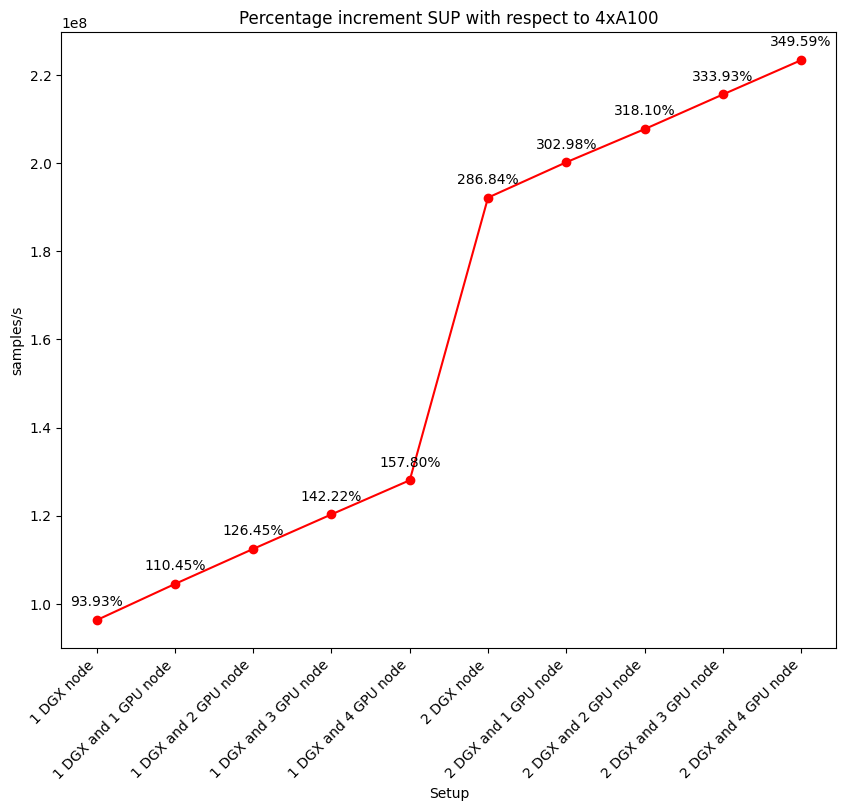

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

setup_values = df_runs_sup['setups']
samples_s_increment = ((df_runs_sup["samples/s-sum"] - 0.5 * A100x8_speed_sup) / (0.5 * A100x8_speed_sup)) * 100
print(samples_s_increment)
dots = plt.plot(df_runs_sup['setups'], df_runs_sup["samples/s-sum"], marker='o', color='red', label='Percentage Increment')

for i, txt in enumerate(samples_s_increment):
    ax.annotate(f'{samples_s_increment[i]:.2f}%', (setup_values[i], df_runs_sup["samples/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Percentage increment SUP with respect to 4xA100')
plt.ylabel('samples/s')
plt.xlabel('Setup')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# Percentage increment Gb/s

0     88.232381
1    104.670476
2    116.243810
3    132.320000
4    147.577143
5    263.127619
6    277.584762
7    293.142857
8    310.628571
9    325.752381
Name: Gb/s-sum, dtype: float64
[100.0929523809524, 115.4103619047619, 130.72777142857146, 146.04518095238095, 161.36259047619052, 300.1859047619048, 315.50331428571434, 330.8207238095238, 346.13813333333337, 361.4555428571429]


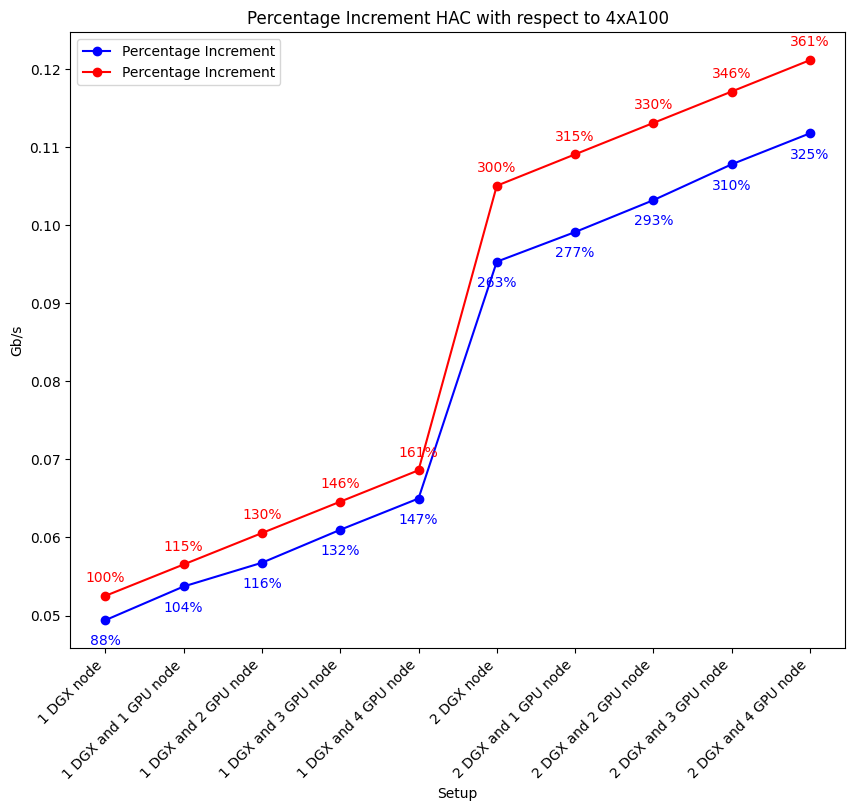

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

#MEASURED VALUES
setup_values = df_runs_hac['setups']
gbps_increment = ((df_runs_hac["Gb/s-sum"] - 0.5*Gb_A100x8_speed_hac) / (0.5*Gb_A100x8_speed_hac)) * 100
print(gbps_increment)
dots = plt.plot(df_runs_hac['setups'], df_runs_hac["Gb/s-sum"], marker='o', color='blue', label='Percentage Increment')


#EXPECTED VALUES
gbps_increment_expected = [((gb_speed - 0.5*Gb_A100x8_speed_hac) / (0.5*Gb_A100x8_speed_hac)) * 100 for gb_speed in hac_setup_expected_speed_Gb]
print(gbps_increment_expected)
dots_expected = plt.plot(df_runs_hac['setups'], hac_setup_expected_speed_Gb, marker='o', color='red', label='Percentage Increment')


# Annotate Measured Values
for i, txt in enumerate(gbps_increment):
    ax.annotate(f'{int(gbps_increment[i])}%', (setup_values[i], df_runs_hac["Gb/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(0, -18), ha='center', color='blue')

# Annotate Expected Values
for i, txt in enumerate(gbps_increment_expected):
    ax.annotate(f'{int(gbps_increment_expected[i])}%', (setup_values[i], hac_setup_expected_speed_Gb[i]),
                textcoords="offset points", xytext=(0, 10), ha='center', color='red')

plt.title('Percentage Increment HAC with respect to 4xA100')
plt.ylabel('Gb/s')

plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()

0     94.026183
1    110.553877
2    126.565962
3    142.336354
4    157.925478
5    287.029204
6    303.182276
7    318.308157
8    334.138973
9    349.808661
Name: Gb/s-sum, dtype: float64
[100.09852970795572, 115.35840886203424, 130.61828801611279, 145.87816717019135, 161.13804632426988, 300.1970594159114, 315.4569385699899, 330.71681772406845, 345.97669687814704, 361.23657603222557]


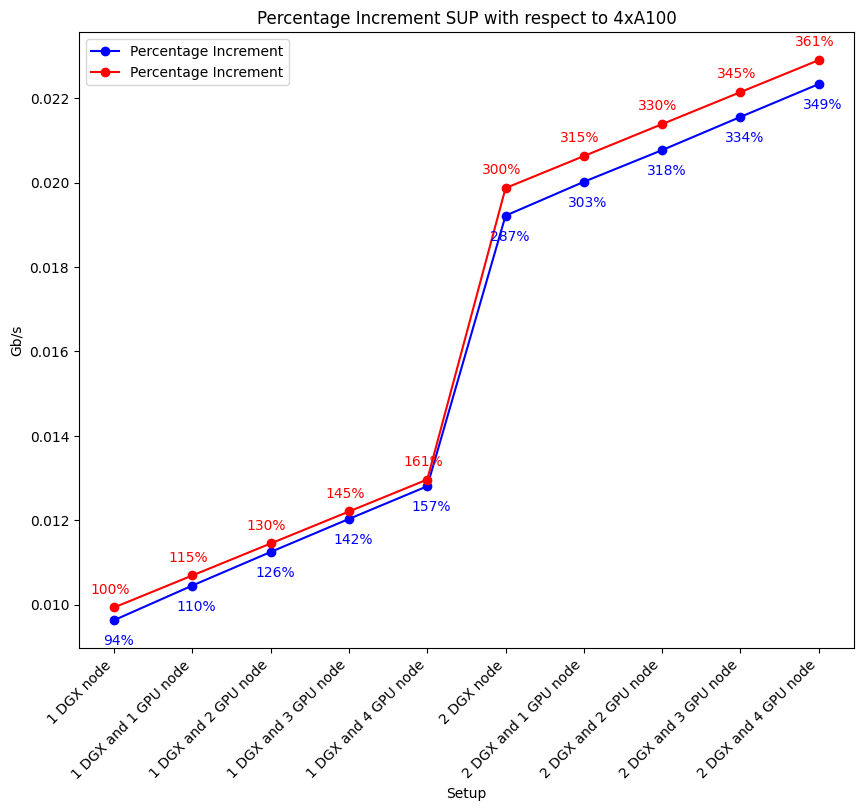

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))

#MEASURED VALUES
setup_values = df_runs_sup['setups']
gbps_increment = ((df_runs_sup["Gb/s-sum"] - 0.5*Gb_A100x8_speed_sup) / (0.5*Gb_A100x8_speed_sup)) * 100
print(gbps_increment)
dots = plt.plot(df_runs_sup['setups'], df_runs_sup["Gb/s-sum"], marker='o', color='blue', label='Percentage Increment')


#EXPECTED VALUES
gbps_increment_expected = [((gb_speed - 0.5*Gb_A100x8_speed_sup) / (0.5*Gb_A100x8_speed_sup)) * 100 for gb_speed in sup_setup_expected_speed_Gb]
print(gbps_increment_expected)
dots_expected = plt.plot(df_runs_sup['setups'], sup_setup_expected_speed_Gb, marker='o', color='red', label='Percentage Increment')


# Annotate Measured Values
for i, txt in enumerate(gbps_increment):
    ax.annotate(f'{int(gbps_increment[i])}%', (setup_values[i], df_runs_sup["Gb/s-sum"].iloc[i]),
                textcoords="offset points", xytext=(3, -18), ha='center', color='blue')

# Annotate Expected Values
for i, txt in enumerate(gbps_increment_expected):
    ax.annotate(f'{int(gbps_increment_expected[i])}%', (setup_values[i], sup_setup_expected_speed_Gb[i]),
                textcoords="offset points", xytext=(-3, 10), ha='center', color='red')

plt.title('Percentage Increment SUP with respect to 4xA100')
plt.ylabel('Gb/s')

plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.show()

# Total time comparisons

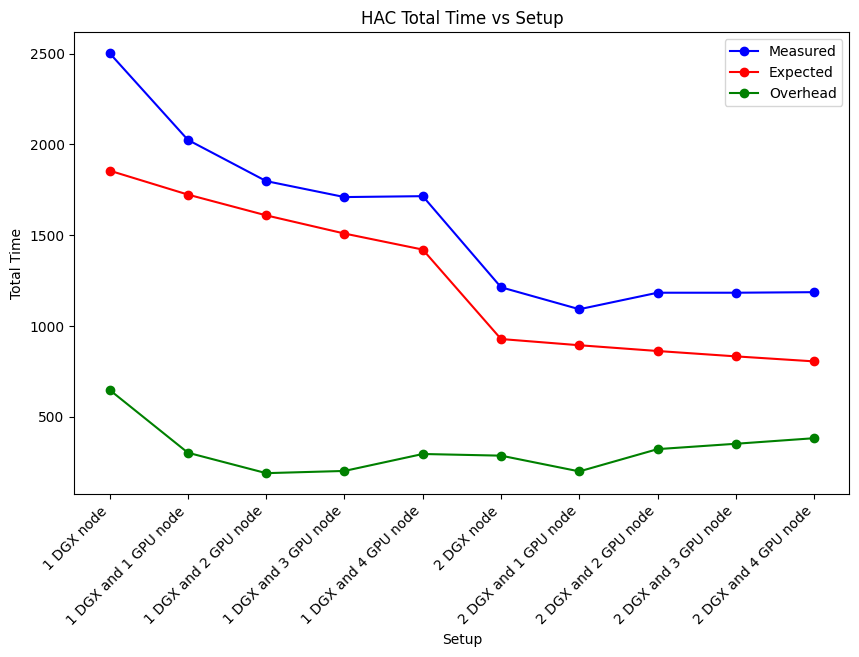

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs_hac['setups'], df_runs_hac['total-time'], marker='o', color='blue', label='Measured')
plt.plot(df_runs_hac['setups'], hac_setup_expected_time, marker='o', color='red', label='Expected')
plt.plot(df_runs_hac['setups'], df_runs_hac['total-time']-hac_setup_expected_time, marker='o', color='green', label='Overhead')


plt.ylabel('Total Time')

plt.title('HAC Total Time vs Setup')

plt.xticks(rotation=45, ha='right')
plt.legend()

plt.show()


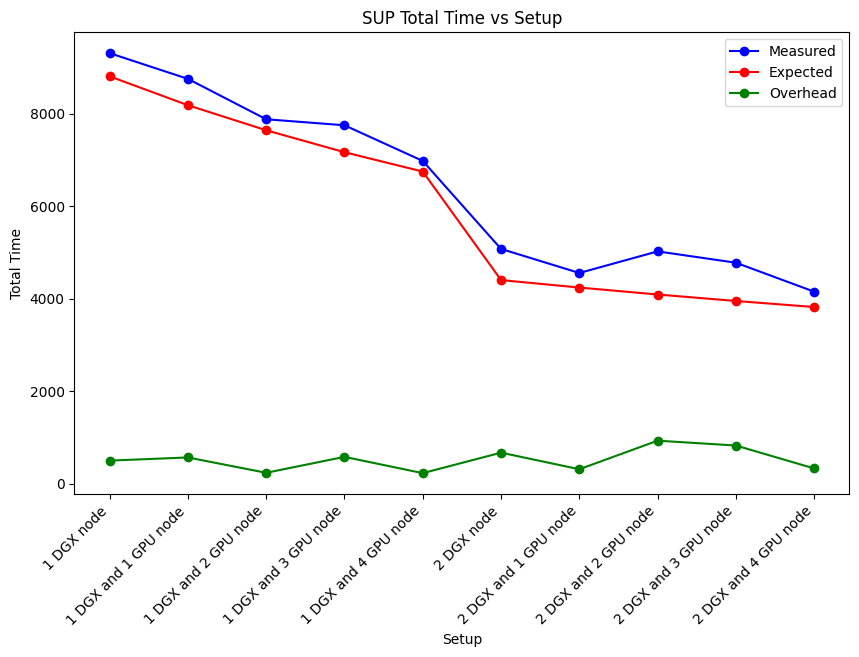

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs_sup['setups'], df_runs_sup['total-time'], marker='o', color='blue', label='Measured')
plt.plot(df_runs_sup['setups'], sup_setup_expected_time, marker='o', color='red', label='Expected')
plt.plot(df_runs_sup['setups'], df_runs_sup['total-time']-sup_setup_expected_time, marker='o', color='green', label='Overhead')


plt.ylabel('Total Time')
plt.title('SUP Total Time vs Setup')

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()